In [1]:
%matplotlib inline
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import csv
import gzip
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
Home_loan_df = pd.read_csv("train_u6lujuX.csv")
Test_df = pd.read_csv("test_Y3wMUE5.csv")
Sample_submission = pd.read_csv("Sample_Submission_ZAuTl8O.csv")

In [16]:
Home_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null object
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(7), int64(4), object(2)
memory usage: 67.2+ KB


In [9]:
#convert gender value to numeric for train and test
ordered_gender = Home_loan_df["Gender"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_gender)),index = ordered_gender).to_dict()
Home_loan_df["Gender"] = Home_loan_df["Gender"].map(map_values_dict)

#for test_df
ordered_gender_test = Test_df["Gender"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_gender_test)),index = ordered_gender_test).to_dict()
Test_df["Gender"] = Test_df["Gender"].map(map_values_dict)

In [10]:
#train
ordered_married = Home_loan_df["Married"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_married)),index = ordered_married).to_dict()
Home_loan_df["Married"] = Home_loan_df["Married"].map(map_values_dict)

#Test
ordered_married_test = Test_df["Married"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_married_test)),index = ordered_married_test).to_dict()
Test_df["Married"] = Test_df["Married"].map(map_values_dict)

In [11]:
#Train
ordered_Education = Home_loan_df["Education"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_Education)),index = ordered_Education).to_dict()
Home_loan_df["Education"] = Home_loan_df["Education"].map(map_values_dict)

#Test
ordered_Education_test = Test_df["Education"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_Education_test)),index = ordered_Education_test).to_dict()
Test_df["Education"] = Test_df["Education"].map(map_values_dict)


In [12]:
#Train
ordered_Selfemp = Home_loan_df["Self_Employed"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_Selfemp)),index = ordered_Selfemp).to_dict()
Home_loan_df["Self_Employed"] = Home_loan_df["Self_Employed"].map(map_values_dict)

#Test
ordered_Selfemp_test = Test_df["Self_Employed"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_Selfemp_test)),index = ordered_Selfemp_test).to_dict()
Test_df["Self_Employed"] = Test_df["Self_Employed"].map(map_values_dict)

In [13]:
ordered_Property = Home_loan_df["Property_Area"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_Property)),index = ordered_Property).to_dict()
Home_loan_df["Property_Area"] = Home_loan_df["Property_Area"].map(map_values_dict)

ordered_Property_test = Test_df["Property_Area"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_Property_test)),index = ordered_Property_test).to_dict()
Test_df["Property_Area"] = Test_df["Property_Area"].map(map_values_dict)

In [14]:
ordered_loanstatus = Home_loan_df["Loan_Status"].value_counts().index.order()
map_values_dict = Series(range(0,len(ordered_loanstatus)),index = ordered_loanstatus).to_dict()
Home_loan_df["Loan_Status"] = Home_loan_df["Loan_Status"].map(map_values_dict)

In [15]:
Home_loan_df.corr(method='pearson')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.024556,0.019857
Married,0.369612,1.000000,0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.002918,0.089280
Education,0.049258,0.014223,1.000000,-0.012333,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,-0.065243,-0.085884
Self_Employed,-0.009829,0.001909,-0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.031214,-0.002303
ApplicantIncome,0.053989,0.051332,-0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.083946,0.077770,-0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.106947,0.149519,-0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,-0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,0.016337,0.004381,-0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678
Property_Area,-0.024556,0.002918,-0.065243,-0.031214,-0.009500,0.010522,-0.045792,-0.078748,-0.001969,1.000000,0.032112


With the help of this we can see that the relation between Credit History and loan status is 0.5616 which indicates that Credit history is an important feature for loan prediction.

In [14]:
#fill the missing values
#Gender
Home_loan_df.Gender.fillna(1, inplace = True)
Test_df.Gender.fillna(1, inplace= True)

#married 
Home_loan_df.Married.fillna(1,inplace = True)
Test_df.Married.fillna(1,inplace=True)

#Dependents 
Home_loan_df.Dependents.fillna(0,inplace = True)
Test_df.Dependents.fillna(0,inplace=True)

#Self-Employed
Home_loan_df.Self_Employed.fillna(0,inplace = True)
Test_df.Self_Employed.fillna(0,inplace=True)

#credit History 
Home_loan_df.Credit_History.fillna(1,inplace=True)
Test_df.Credit_History.fillna(1,inplace = True)

#loan amount term
Home_loan_df.Loan_Amount_Term.fillna(360.0,inplace=True)
Test_df.Loan_Amount_Term.fillna(360.0,inplace = True)

In [15]:
#Dependents 
Home_loan_df["Dependents"] = Home_loan_df["Dependents"].map({0: 0, "0": 0, "1": 1, "2": 2, "3+": 3})
Test_df["Dependents"] = Test_df["Dependents"].map({0: 0, "0": 0, "1": 1, "2": 2, "3+": 3})

In [16]:
#lets now fill in the missing values in  Applicantincome and co-applicantincome
# get average, std, and number of NaN values in Home_loan_df
average_loanamount = Home_loan_df["LoanAmount"].mean()
#print average_loanamount
std_loanamount = Home_loan_df["LoanAmount"].std()
#print std_loanamount
count_nan_loanamount = Home_loan_df["LoanAmount"].isnull().sum()
#print count_nan_loanamount

# get average, std, and number of NaN values in test_df
average_loanamount_test   = Test_df["LoanAmount"].mean()
#print average_loanamount_test
std_loanamount_test  = Test_df["LoanAmount"].std()
#print std_loanamount_test
count_nan_loanamount_test = Test_df["LoanAmount"].isnull().sum()
#print count_nan_loanamount_test

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_loanamount - std_loanamount, average_loanamount + std_loanamount, size = count_nan_loanamount)
rand_2 = np.random.randint(average_loanamount_test - std_loanamount_test, average_loanamount_test + std_loanamount_test, size = count_nan_loanamount_test)
#print rand_1
#print rand_2

# fill NaN values in Age column with random values generated
Home_loan_df["LoanAmount"][np.isnan(Home_loan_df["LoanAmount"])] = rand_1
Test_df["LoanAmount"][np.isnan(Test_df["LoanAmount"])] = rand_2

# convert from float to int
Home_loan_df["LoanAmount"] = Home_loan_df["LoanAmount"].astype(int)
Test_df["LoanAmount"]  = Test_df["LoanAmount"].astype(int)


C:\Users\Venkatesh\Anaconda\lib\site-packages\IPython\kernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Venkatesh\Anaconda\lib\site-packages\IPython\kernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


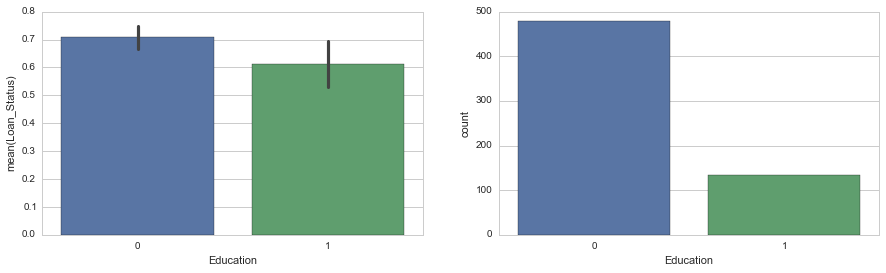

In [13]:
#Now lets visualize our data
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x="Education", data=Home_loan_df, ax=axis2)
sns.barplot(x="Education", y="Loan_Status", data=Home_loan_df,ax=axis1)

Here we visualize that education can be considered as slightly important factor when it comes to providing loans but it is not that important. However if compared with other features it can be taken into consideration.

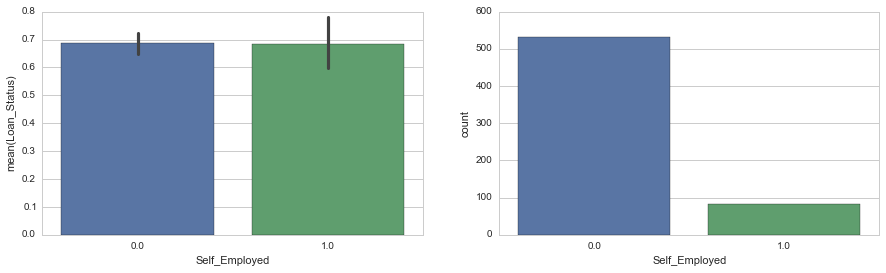

In [14]:
#Lets check if self-Employee is an important factor when it comes to giving loans
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x="Self_Employed", y="Loan_Status", data=Home_loan_df,ax=axis1)
sns.countplot(x="Self_Employed", data=Home_loan_df, ax=axis2)

Here we can say that Self_Employed is surely not an important factor when it comes to giving loan. 

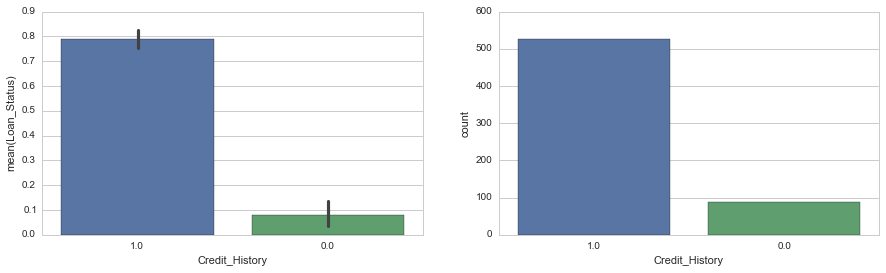

In [15]:
#Credit History
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x="Credit_History", y="Loan_Status", data=Home_loan_df,ax=axis1)
sns.countplot(x="Credit_History", data=Home_loan_df, ax=axis2)

Now here is something which we see interesting! As said earlier that Credit_History is the most important feature and here too when we visualize our data we see that if the credit history is 0 then it is most likely that that person will not be given a loan from the company.

In [16]:
#change the ID values
Home_loan_df['Loan_ID2'] = Home_loan_df['Loan_ID'].apply(lambda x:int(str(x)[2:]))
Test_df['Loan_ID2'] = Test_df['Loan_ID'].apply(lambda x:int(str(x)[2:]))

In [17]:
#drop the original loan_ID
Home_loan_df = Home_loan_df.drop("Loan_ID", axis = 1)
Test_df = Test_df.drop("Loan_ID", axis = 1)

In [22]:
New_Home_df = Home_loan_df.copy()
New_Test_df = Test_df.copy()

In [23]:
New_Home_df.drop("Loan_ID2", axis = 1, inplace = True)

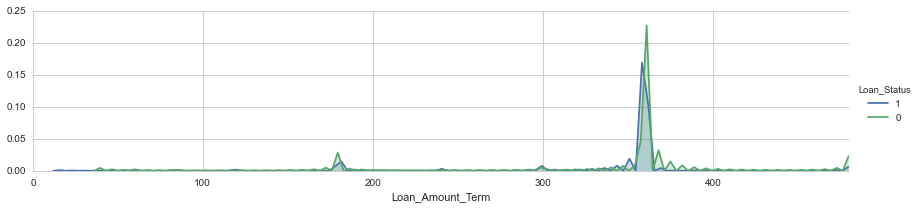

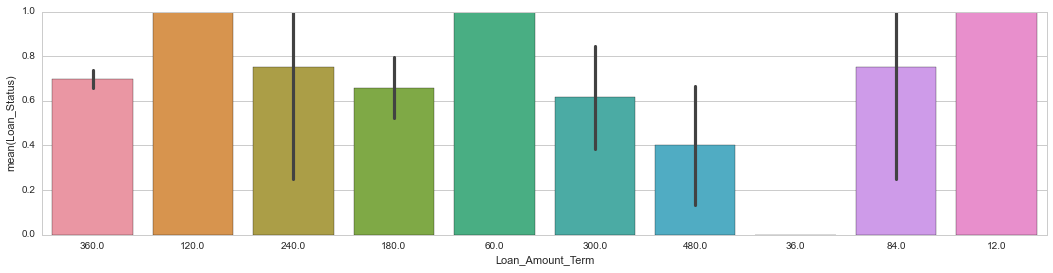

In [24]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(Home_loan_df, hue="Loan_Status",aspect=4)
facet.map(sns.kdeplot,'Loan_Amount_Term',shade= True)
facet.set(xlim=(0, Home_loan_df['Loan_Amount_Term'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_Income = Home_loan_df[["Loan_Amount_Term", "Loan_Status"]].groupby(['Loan_Amount_Term'],as_index=False).mean()
sns.barplot(x='Loan_Amount_Term', y='Loan_Status', data=Home_loan_df)

In the first graph it clearly states that most of the applicants have took the option of loan amount term to be 360 months. The second graph shows the comparison of loan amount term to the loan status.

In [25]:
#Training and testing data
X_train = New_Home_df.drop("Loan_Status",axis=1)
Y_train = New_Home_df["Loan_Status"]
X_test  = New_Test_df.drop("Loan_ID2",axis=1).copy()


In [22]:
#feature selection
#X_new = SelectKBest(chi2, k=3).fit_transform(X_train, Y_train)

In [23]:
# Logistic Regression

logreg = LogisticRegression()

clf = logreg.fit(X_train, Y_train)

In [24]:
scores = cross_validation.cross_val_score(clf, X_train, Y_train,
                                          cv=5, scoring='roc_auc')
scores

array([ 0.77616893,  0.65550528,  0.67857143,  0.80419799,  0.69862155])

Logistic regression has given a good score and can be used for prediction.

In [33]:
random_forest = RandomForestClassifier(n_estimators=150)

clf = random_forest.fit(X_train, Y_train)

In [34]:
scores = cross_validation.cross_val_score(clf, X_train, Y_train,
                                          cv=5, scoring='roc_auc')
scores

array([ 0.81055807,  0.6811463 ,  0.77020677,  0.82424812,  0.7575188 ])

Random forest also showed a fairly good performance like the logistic regression. However both show silimar performance so either of them can be used.

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_Boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                  max_depth=1, random_state=0)
clf = Gradient_Boost.fit(X_train, Y_train)

In [31]:
scores = cross_validation.cross_val_score(clf, X_train, Y_train,
                                          cv=5, scoring='roc_auc')
scores

array([ 0.73167421,  0.69502262,  0.68389724,  0.81109023,  0.75031328])

In [35]:
# Random Forests

#random_forest = RandomForestClassifier(n_estimators=150)

#clf = random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

1.0

In [30]:
foo = "LP00"
submission = pd.DataFrame({
        "Loan_ID": foo + "" + Test_df["Loan_ID2"].map(str),
        "Loan_Status": Y_pred
        
    })
submission.to_csv("THEFINALRESULT.csv", index = False)




In [31]:
Testedcsv = pd.read_csv("THEFINALRESULT.csv")
Testedcsv["Loan_Status"] = Testedcsv["Loan_Status"].map({0: "N", 1: "Y"})

In [32]:
submission = pd.DataFrame({
        "Loan_ID": Testedcsv.Loan_ID,
        "Loan_Status": Testedcsv.Loan_Status
        
    })
submission.to_csv("THEFINALRESULT.csv", index = False)

##Conclusion
This project's dataset is from Dream Housing Finance Company which was hosted on Analytics Vidhya.